# Deliverables:

- Submit a single zip-compressed file that has the name: YourLastName_Exercise_1 that has the following files:

 1. Your **PDF document** that has your Source code and output
 2. Your **ipynb script** that has your Source code and output


# Objectives:

In this exercise, you will:

 - Analyze the dataset in the given CSV file
 - Clean the given dataset
 - Load the dataset into sqlite database engine
 - Execute different SQL queries




# Submission Formats :

Create a folder or directory with all supplementary files with your last name at the beginning of the folder name, compress that folder with zip compression, and post the zip-archived folder under the assignment link in Canvas. The following files should be included in an archive folder/directory that is uploaded as a single zip-compressed file. (Use zip, not StuffIt or any 7z or any other compression method.)


1. Complete IPYNB script that has the source code in Python used to access and analyze the data. The code should be submitted as an IPYNB script that can be be loaded and run in Jupyter Notebook for Python
2. Output from the program, such as console listing/logs, text files, and graphics output for visualizations. If you use the Data Science Computing Cluster or School of Professional Studies database servers or systems, include Linux logs of your sessions as plain text files. Linux logs may be generated by using the script process at the beginning of your session, as demonstrated in tutorial handouts for the DSCC servers.
3. List file names and descriptions of files in the zip-compressed folder/directory.


Formatting Python Code
When programming in Python, refer to Kenneth Reitz’ PEP 8: The Style Guide for Python Code:
http://pep8.org/ (Links to an external site.)Links to an external site.
There is the Google style guide for Python at
https://google.github.io/styleguide/pyguide.html (Links to an external site.)Links to an external site.
Comment often and in detail.


###   Data Preparation

As a data scientist for BestDeal retailer, you
have been tasked with improving their revenue and the effectiveness of the
marketing campaign of their electronic products. The given dataset has
10,000 records for the purchases of their customers and is used to predict
customers shopping patterns and to provide answers for ad-hoc queries.
The dataset DirtyData4BestDeal10000.csv is drawn from its database of
customers.

In [7]:
import pandas as pd  # panda's nickname is pd

import numpy as np  # numpy as np

from pandas import DataFrame, Series     # for convenience

import sqlalchemy

from sqlalchemy import create_engine

from sqlalchemy import inspect

### Lets ead the dirtydata4bestdeal CSV and load into a dataframe object

In [8]:
dirtydata4bestdeal=pd.read_csv('DirtyData4BestDeal10000.csv')

In [9]:

# Do you see NaN values below?

dirtydata4bestdeal.head()

ZipCode  CustomerAge  SamsungTV46LED SonyTV42LED XBOX360 DellLaptop  \
0  30134.0         35.0               1           1       1          0   
1  62791.0         43.0               0           1       0          0   
2  60611.0         23.0               1         NaN       0          1   
3  60616.0         56.0               0           1       1          1   
4  30303.0         25.0               1         NaN       0        NaN   

  BoseSoundSystem  BoseHeadSet  SonyHeadSet  iPod  ...  GalaxyTablet  \
0               0          1.0          1.0   0.0  ...             1   
1               1          0.0          1.0   0.0  ...             1   
2               0          NaN          1.0   1.0  ...             0   
3               0          0.0          1.0   1.0  ...             0   
4               1          1.0          1.0   0.0  ...             1   

   SurfaceTablet  HPLaptop  HDMICable  SpeakerCable  CallOfDutyGame  \
0            0.0       1.0        1.0           1.0             1.0   
1            0.0       1.0        0.0           1.0             1.0   
2            0.0       1.0        0.0           1.0             1.0   
3            0.0       1.0        0.0           1.0             0.0   
4            0.0       1.0        1.0           1.0             1.0   

   GrandTheftAutoGame  ASUSLaptop  LenevoLaptop  TVStandWallMount  
0                 0.0         1.0           1.0                 1  
1                 0.0         1.0           1.0                 1  
2                 0.0         NaN           1.0                 1  
3                 0.0         1.0           0.0                 0  
4                 0.0         1.0          10.0                 0  

[5 rows x 34 columns]

### Lets use boxplot to visualize the data and get an idea if there are dirty/messy/invalid data

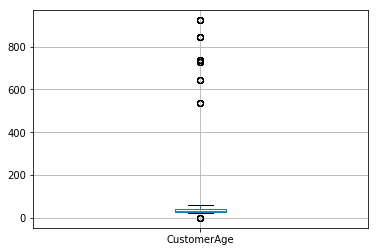

In [10]:
dirtydata4bestdeal.boxplot(column='CustomerAge')

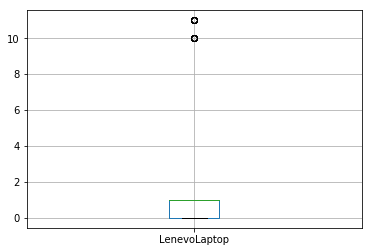

In [11]:
dirtydata4bestdeal.boxplot(column='LenevoLaptop')

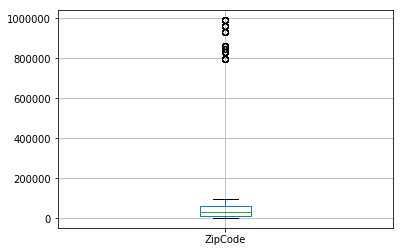

In [12]:
dirtydata4bestdeal.boxplot(column='ZipCode')

### Lets clean the dirty/messy data in the dirtydata4bestdeal dataframe object

In [13]:
# Drop the NaN values 

cleandata4bestdeal=dirtydata4bestdeal.dropna()
cleandata4bestdeal.head()

# Do you see NaN values dropped below?


ZipCode  CustomerAge  SamsungTV46LED SonyTV42LED XBOX360 DellLaptop  \
0  30134.0         35.0               1           1       1          0   
1  62791.0         43.0               0           1       0          0   
3  60616.0         56.0               0           1       1          1   
5   2108.0         55.0               1           1       1          1   
6  90033.0         44.0               1           1       1          1   

  BoseSoundSystem  BoseHeadSet  SonyHeadSet  iPod  ...  GalaxyTablet  \
0               0          1.0          1.0   0.0  ...             1   
1               1          0.0          1.0   0.0  ...             1   
3               0          0.0          1.0   1.0  ...             0   
5              10          0.0          0.0   0.0  ...             1   
6               0          0.0          0.0   0.0  ...             1   

   SurfaceTablet  HPLaptop  HDMICable  SpeakerCable  CallOfDutyGame  \
0            0.0       1.0        1.0           1.0             1.0   
1            0.0       1.0        0.0           1.0             1.0   
3            0.0       1.0        0.0           1.0             0.0   
5            1.0       1.0        1.0           1.0             1.0   
6            1.0       1.0        1.0           0.0             1.0   

   GrandTheftAutoGame  ASUSLaptop  LenevoLaptop  TVStandWallMount  
0                 0.0         1.0           1.0                 1  
1                 0.0         1.0           1.0                 1  
3                 0.0         1.0           0.0                 0  
5                 0.0         1.0           0.0                 0  
6                 1.0         0.0           0.0                 1  

[5 rows x 34 columns]

In [8]:
# Drop the NaN values 

cleandata4bestdeal=dirtydata4bestdeal.dropna()
cleandata4bestdeal.head()


colNames = (list(cleandata4bestdeal.columns.values))

#Slice the valid Customer Ages only
allCleanData4bestdeal = cleandata4bestdeal[(cleandata4bestdeal['CustomerAge'] >= 18) & (cleandata4bestdeal['CustomerAge'] <= 150)]
allCleanData4bestdeal.ZipCode = np.where(allCleanData4bestdeal.ZipCode > 99999, np.nan, allCleanData4bestdeal.ZipCode).copy()
allCleanData4bestdeal.dropna(inplace=True)

#Clean the blanks with NaN and then drop NAN.
#Slice the valid binary values : 0 or 1 valid data

for col in colNames[2:]:
   allCleanData4bestdeal[col].replace(' ',np.nan,inplace=True)
   allCleanData4bestdeal.dropna(subset=[col],inplace=True)
   allCleanData4bestdeal[col] = allCleanData4bestdeal[col].astype(int)
   allCleanData4bestdeal = allCleanData4bestdeal[allCleanData4bestdeal[col].isin([1,0])]

#Sanity test your clean data
print(allCleanData4bestdeal.shape)
cleandata4bestdeal = allCleanData4bestdeal.copy()


/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda3/lib/python3

(9092, 34)


In [14]:
# This also works for the same solution.

df = cleandata4bestdeal

df.CustomerAge = np.where(df.CustomerAge < 18, np.nan, df.CustomerAge)
df.CustomerAge = np.where(df.CustomerAge > 150, np.nan, df.CustomerAge)
df.ZipCode = np.where(df.ZipCode > 99999, np.nan, df.ZipCode)
df.dropna(inplace=True)

for col in df.columns[2:]:
    df[col].replace(' ',np.nan, inplace=True)
    df[col].dropna(inplace=True)
    df[col]=df[col].astype(int)
    df[col]=np.where(df[col]>1, np.nan, df[col])
    
df.dropna(inplace=True)

cleandata4bestdeal = df.copy()
cleandata4bestdeal.shape

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda3/lib/python3.6/site-packages/ipyke

(9092, 34)

### Lets store the cleaned data into the Database

In [15]:
engine=create_engine('sqlite:///bestdeal.db')

In [16]:
cleandata4bestdeal.to_sql('trans4cust', engine)

ValueError: Table 'trans4cust' already exists.

** Sanity Test: Did it create the table in bestdeal.db?  Check!!**

In [30]:
insp=inspect(engine)

In [31]:
insp.get_table_names()

['trans4cust']

In [32]:
pd.read_sql_table('trans4cust', engine).columns

Index(['index', 'ZipCode', 'CustomerAge', 'SamsungTV46LED', 'SonyTV42LED',
       'XBOX360', 'DellLaptop', 'BoseSoundSystem', 'BoseHeadSet',
       'SonyHeadSet', 'iPod', 'iPhone', 'Panasonic50LED', 'SonyPS4', 'WiiU',
       'WDexternalHD', 'SamsungTV55LED', 'SonyTV60LED', 'SandiskMemoryCard',
       'SonySoundSystem', 'SonyCamera', 'PanasonicCamera', 'HPPrinter',
       'SonyDVDplayer', 'ToshibaDVDplayer', 'GalaxyTablet', 'SurfaceTablet',
       'HPLaptop', 'HDMICable', 'SpeakerCable', 'CallOfDutyGame',
       'GrandTheftAutoGame', 'ASUSLaptop', 'LenevoLaptop', 'TVStandWallMount'],
      dtype='object')

### Now we are ready to query the Database

#### Query example #1: get the transactions for the customers in zipCode 60616

In [33]:
resultsForBestDealCustTrans=pd.read_sql_query("SELECT * FROM trans4cust WHERE ZipCode='60616'", engine)

In [34]:
resultsForBestDealCustTrans.head()

index  ZipCode  CustomerAge  SamsungTV46LED  SonyTV42LED  XBOX360  \
0      3  60616.0         56.0             0.0          1.0      1.0   
1     16  60616.0         43.0             0.0          1.0      1.0   
2     18  60616.0         54.0             1.0          0.0      0.0   
3     23  60616.0         43.0             1.0          1.0      1.0   
4     34  60616.0         31.0             0.0          1.0      1.0   

   DellLaptop  BoseSoundSystem  BoseHeadSet  SonyHeadSet  ...  GalaxyTablet  \
0         1.0              0.0          0.0          1.0  ...           0.0   
1         0.0              1.0          0.0          1.0  ...           1.0   
2         1.0              0.0          1.0          1.0  ...           0.0   
3         0.0              1.0          1.0          1.0  ...           1.0   
4         1.0              0.0          0.0          1.0  ...           1.0   

   SurfaceTablet  HPLaptop  HDMICable  SpeakerCable  CallOfDutyGame  \
0            0.0       1.0        0.0           1.0             0.0   
1            0.0       1.0        1.0           1.0             1.0   
2            1.0       1.0        0.0           1.0             1.0   
3            1.0       1.0        1.0           0.0             1.0   
4            0.0       1.0        1.0           1.0             1.0   

   GrandTheftAutoGame  ASUSLaptop  LenevoLaptop  TVStandWallMount  
0                 0.0         1.0           0.0               0.0  
1                 0.0         1.0           1.0               1.0  
2                 0.0         1.0           1.0               1.0  
3                 0.0         1.0           1.0               1.0  
4                 1.0         0.0           0.0               1.0  

[5 rows x 35 columns]

#### Query example #2: get the transactions for ALL customers

In [35]:
resultsForBestDealCustTrans=pd.read_sql_query("SELECT * FROM trans4cust", engine)

In [36]:
resultsForBestDealCustTrans.head()

index  ZipCode  CustomerAge  SamsungTV46LED  SonyTV42LED  XBOX360  \
0      0  30134.0         35.0             1.0          1.0      1.0   
1      1  62791.0         43.0             0.0          1.0      0.0   
2      3  60616.0         56.0             0.0          1.0      1.0   
3      6  90033.0         44.0             1.0          1.0      1.0   
4      9   2109.0         37.0             0.0          1.0      1.0   

   DellLaptop  BoseSoundSystem  BoseHeadSet  SonyHeadSet  ...  GalaxyTablet  \
0         0.0              0.0          1.0          1.0  ...           1.0   
1         0.0              1.0          0.0          1.0  ...           1.0   
2         1.0              0.0          0.0          1.0  ...           0.0   
3         1.0              0.0          0.0          0.0  ...           1.0   
4         0.0              1.0          0.0          1.0  ...           0.0   

   SurfaceTablet  HPLaptop  HDMICable  SpeakerCable  CallOfDutyGame  \
0            0.0       1.0        1.0           1.0             1.0   
1            0.0       1.0        0.0           1.0             1.0   
2            0.0       1.0        0.0           1.0             0.0   
3            1.0       1.0        1.0           0.0             1.0   
4            0.0       1.0        0.0           1.0             0.0   

   GrandTheftAutoGame  ASUSLaptop  LenevoLaptop  TVStandWallMount  
0                 0.0         1.0           1.0               1.0  
1                 0.0         1.0           1.0               1.0  
2                 0.0         1.0           0.0               0.0  
3                 1.0         0.0           0.0               1.0  
4                 0.0         1.0           1.0               0.0  

[5 rows x 35 columns]

#### Query example #3: get the number of customers in every ZipCode sorted by ZipCode

In [37]:
resultsForBestDealCustTrans=pd.read_sql_query("SELECT ZipCode , COUNT(*) as 'num_customers' FROM trans4cust GROUP BY ZipCode  ORDER BY ZipCode", engine)

In [38]:
resultsForBestDealCustTrans

ZipCode  num_customers
0    2108.0            613
1    2109.0            917
2    2110.0            224
3   10065.0            750
4   30134.0           1133
5   30303.0            985
6   33129.0            531
7   33130.0            280
8   44114.0            510
9   60532.0            243
10  60585.0            240
11  60603.0            224
12  60611.0             62
13  60616.0            951
14  62791.0              3
15  90024.0            144
16  90033.0            631
17  94102.0            164
18  94158.0            487

#### Query example #4: get the number of customers for  every Age Group in ZipCode 60616 sorted by CustomerAge

In [39]:
resultsForBestDealCustTrans=pd.read_sql_query(
"SELECT CustomerAge , COUNT(*) as 'num_customers' FROM trans4cust WHERE ZipCode=60616 GROUP BY CustomerAge  ORDER BY CustomerAge", engine)

In [40]:
resultsForBestDealCustTrans

CustomerAge  num_customers
0          21.0             56
1          22.0             32
2          23.0             40
3          25.0             88
4          26.0             48
5          27.0             32
6          28.0             32
7          29.0             56
8          31.0             16
9          32.0             16
10         34.0             96
11         35.0             72
12         37.0             64
13         38.0             24
14         39.0              8
15         43.0             48
16         44.0             87
17         45.0             24
18         46.0             24
19         51.0              8
20         54.0             48
21         56.0             32

#### Query example #5: Plot in a stacked-bar figure the number of customers who bought SonyTV60LED and/or BoseSoundSystem in  every zipcode that has more than 400 customers who bought these two products(either bought one of these products or the two products)

In [41]:
SonyTV60LEDCustTrans=pd.read_sql_query(
"SELECT ZipCode , COUNT(*) as 'num_customers' FROM trans4cust WHERE SonyTV60LED=1  GROUP BY ZipCode HAVING COUNT(*) > 400", engine)

BoseSoundSystemCustTrans=pd.read_sql_query(
"SELECT ZipCode , COUNT(*) as 'num_customers' FROM trans4cust WHERE BoseSoundSystem=1 GROUP BY ZipCode HAVING COUNT(*) > 400", engine)

In [42]:
cleandata4bestdeal[cleandata4bestdeal.ZipCode==2108][cleandata4bestdeal.BoseSoundSystem==1]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


ZipCode  CustomerAge  SamsungTV46LED  SonyTV42LED  XBOX360  DellLaptop  \
43     2108.0         26.0             0.0          1.0      1.0         0.0   
119    2108.0         27.0             1.0          1.0      1.0         0.0   
163    2108.0         28.0             1.0          1.0      1.0         0.0   
195    2108.0         28.0             1.0          1.0      1.0         0.0   
198    2108.0         23.0             1.0          1.0      1.0         0.0   
315    2108.0         23.0             0.0          1.0      1.0         0.0   
447    2108.0         28.0             1.0          1.0      1.0         0.0   
479    2108.0         28.0             1.0          1.0      1.0         0.0   
482    2108.0         23.0             1.0          1.0      1.0         0.0   
522    2108.0         43.0             0.0          1.0      1.0         0.0   
586    2108.0         23.0             0.0          1.0      1.0         0.0   
618    2108.0         23.0             0.0          1.0      1.0         0.0   
695    2108.0         27.0             1.0          1.0      1.0         0.0   
739    2108.0         28.0             1.0          1.0      1.0         0.0   
771    2108.0         28.0             1.0          1.0      1.0         0.0   
774    2108.0         23.0             1.0          1.0      1.0         0.0   
814    2108.0         43.0             0.0          1.0      1.0         0.0   
878    2108.0         23.0             0.0          1.0      1.0         0.0   
967    2108.0         27.0             1.0          1.0      1.0         0.0   
1011   2108.0         28.0             1.0          1.0      1.0         0.0   
1043   2108.0         28.0             1.0          1.0      1.0         0.0   
1086   2108.0         43.0             0.0          1.0      1.0         0.0   
1150   2108.0         23.0             0.0          1.0      1.0         0.0   
1182   2108.0         23.0             0.0          1.0      1.0         0.0   
1292   2108.0         26.0             0.0          1.0      1.0         0.0   
1368   2108.0         27.0             1.0          1.0      1.0         0.0   
1412   2108.0         28.0             1.0          1.0      1.0         0.0   
1444   2108.0         28.0             1.0          1.0      1.0         0.0   
1447   2108.0         23.0             1.0          1.0      1.0         0.0   
1564   2108.0         23.0             0.0          1.0      1.0         0.0   
...       ...          ...             ...          ...      ...         ...   
8461   2108.0         27.0             1.0          1.0      1.0         0.0   
8505   2108.0         28.0             1.0          1.0      1.0         0.0   
8537   2108.0         28.0             1.0          1.0      1.0         0.0   
8580   2108.0         43.0             0.0          1.0      1.0         0.0   
8644   2108.0         23.0             0.0          1.0      1.0         0.0   
8676   2108.0         23.0             0.0          1.0      1.0         0.0   
8786   2108.0         26.0             0.0          1.0      1.0         0.0   
8862   2108.0         27.0             1.0          1.0      1.0         0.0   
8906   2108.0         28.0             1.0          1.0      1.0         0.0   
8938   2108.0         28.0             1.0          1.0      1.0         0.0   
8941   2108.0         23.0             1.0          1.0      1.0         0.0   
9058   2108.0         23.0             0.0          1.0      1.0         0.0   
9190   2108.0         28.0             1.0          1.0      1.0         0.0   
9222   2108.0         28.0             1.0          1.0      1.0         0.0   
9225   2108.0         23.0             1.0          1.0      1.0         0.0   
9265   2108.0         43.0             0.0          1.0      1.0         0.0   
9329   2108.0         23.0             0.0          1.0      1.0         0.0   
9361   2108.0         23.0             0.0          1.0      1.0         0.0   
9438  

NumSony  NumBose
ZipCode                  
2108       402.0    231.0
2109       578.0    424.0
10065      439.0    270.0
30134      757.0    799.0
30303      517.0    464.0
60616      689.0    466.0
90033      329.0    404.0

<Figure size 432x288 with 0 Axes>

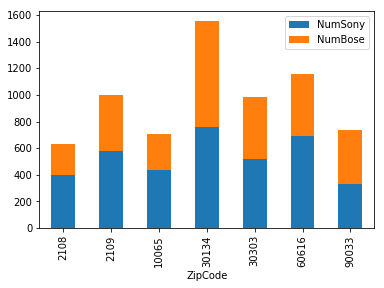

In [43]:
import numpy as np
import matplotlib.pyplot as plt
thisandthat=pd.read_sql_query("SELECT ZipCode, SUM(SonyTV60LED) as NumSony, SUM(BoseSoundSystem) as NumBose, COUNT(ZipCode) as Zip, SonyTV60LED, BoseSoundSystem FROM trans4cust WHERE SonyTV60LED=1 OR BoseSoundSystem=1  GROUP BY ZipCode HAVING NumSony > 400 OR NumBose > 400 ", engine)
plt.figure();
tt = thisandthat.iloc[:,1:3]
tt.index = thisandthat.ZipCode.astype(int)
tt.plot.bar(stacked=True)
tt

In [44]:
SonyTV60LEDCustTrans

ZipCode  num_customers
0   2108.0            402
1   2109.0            578
2  10065.0            439
3  30134.0            757
4  30303.0            517
5  60616.0            689

In [45]:
BoseSoundSystemCustTrans

ZipCode  num_customers
0   2109.0            424
1  30134.0            799
2  30303.0            464
3  60616.0            466
4  90033.0            404

In [46]:
SonyTV60LEDCustTrans.ZipCode


0     2108.0
1     2109.0
2    10065.0
3    30134.0
4    30303.0
5    60616.0
Name: ZipCode, dtype: float64

In [47]:
import numpy

#   There are zipcodes that Sony got bought but not Bose 
#   but there are also zipcodes that Bose got bought but not Sony
#
#   AND we need to use stacked-bar graph and we have a potentially asymmetrical set  of zipcode values
#   So, we need to do somework to create the symmteric set of zipcode values for Sony and Bose


sonyZipCodeTuples=tuple(SonyTV60LEDCustTrans.ZipCode.astype(numpy.int))
sony_num_customersTuples=tuple(SonyTV60LEDCustTrans.num_customers.astype(numpy.int))

boseZipCodeTuples=tuple(BoseSoundSystemCustTrans.ZipCode.astype(numpy.int))
bose_num_customersTuples=tuple(BoseSoundSystemCustTrans.num_customers.astype(numpy.int))

sony_dict = dict(zip(sonyZipCodeTuples, sony_num_customersTuples))
bose_dict = dict(zip(boseZipCodeTuples, bose_num_customersTuples))

for key in bose_dict.keys():
    if ((key in sony_dict.keys()) == False): sony_dict[key]=0
        
for key in sony_dict.keys():
    if ((key in bose_dict.keys()) == False): bose_dict[key]=0


        
bose_zip= sorted(bose_dict.keys())

sony_zip= sorted(sony_dict.keys())

bose_zip_tuple=tuple(bose_zip)

sony_zip_tuple=tuple(sony_zip)

bose_customer_list=[]

for bose in bose_zip_tuple:
    bose_customer_list.append(bose_dict[bose])

sony_customer_list=[]

for sony in sony_zip_tuple:
    sony_customer_list.append(sony_dict[sony])

bose_customer_tuple=tuple(bose_customer_list)
sony_customer_tuple=tuple(sony_customer_list)


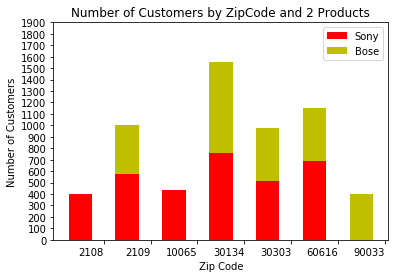

In [48]:
# See docs for bar_stack at the URL
# http://matplotlib.org/examples/pylab_examples/bar_stacked.html

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 


ind = np.arange(len(sony_customer_tuple))    

# the width of the bars: can also be len(x) sequence
width = .5

p1 = plt.bar(ind, sony_customer_tuple, width,  color='r')
p2 = plt.bar(ind, bose_customer_tuple, width, color='y', bottom=sony_customer_tuple)

plt.ylabel('Number of Customers')
plt.xlabel('Zip Code')

plt.title('Number of Customers by ZipCode and 2 Products')

plt.xticks(ind + width, sony_zip_tuple, horizontalalignment='right')

plt.yticks(np.arange(0, 2000, 100))
plt.legend((p1[0], p2[0]), ('Sony', 'Bose'))

plt.show()

# Requirements :
1. (Use SQL/SQlite): get the number of customers who bought DellLaptop and HPPrinter for every Age group sorted by CustomerAge
2. (Use SQL/SQlite): Get the list of ZipCodes where no customer bought XBOX360 (this query means NOT even a single csutomer in that zip code bought XBOX360)
3. (Use SQL/SQlite/Matplotlib): Plot in a stacked-bar figure the number of customers who bought HPLaptop and/or HPPrinter but did NOT buy  WDexternalHD for  every CustomerAge group that has more than 100 customers who bought these two products(either bought one of these products or the two products but didn't buy WDexternalHD)


In [ ]:
# Write your python code that meets the above requirements in this cell

In [48]:
allthat=pd.read_sql_query("SELECT CustomerAge, COUNT(CustomerAge) as NumberOfPeople, DellLaptop, HPPrinter FROM trans4cust WHERE DellLaptop=1 AND HPPrinter=1 GROUP BY CustomerAge  ORDER BY CustomerAge", engine)
allthat.astype(int)

CustomerAge  NumberOfPeople  DellLaptop  HPPrinter
0            21             201           1          1
1            22             203           1          1
2            23             304           1          1
3            25              64           1          1
4            26             183           1          1
5            27             272           1          1
6            28              56           1          1
7            29             143           1          1
8            31             194           1          1
9            32             184           1          1
10           34             120           1          1
11           35             136           1          1
12           36             192           1          1
13           38              16           1          1
14           39              88           1          1
15           42              72           1          1
16           44             184           1          1
17           45              32           1          1
18           46              63           1          1
19           47              32           1          1
20           51              16           1          1
21           53              24           1          1
22           54             127           1          1
23           56             176           1          1
24           57              64           1          1
25           59              80           1          1
26           61              32           1          1

In [50]:
allthat=pd.read_sql_query("SELECT ZipCode, SUM(XBOX360) as 'botXBOX' FROM trans4cust GROUP BY ZipCode HAVING botXBOX = 0", engine)

allthat

ZipCode  botXBOX
0  62791.0      0.0

CustomerAge  NumLap  NumPrin  NumWDHD  NumberOfPeople  HPLaptop
0          21.0   192.0    192.0      0.0             192       1.0
1          22.0   203.0    193.0      0.0             203       1.0
2          23.0   437.0    437.0      0.0             437       1.0
3          25.0   147.0    147.0      0.0             147       1.0
4          26.0   205.0    205.0      0.0             205       1.0
5          27.0   307.0    288.0      0.0             307       1.0
6          28.0   126.0    126.0      0.0             126       1.0
7          29.0   290.0    290.0      0.0             290       1.0
8          31.0   196.0    196.0      0.0             196       1.0
9          32.0   176.0    176.0      0.0             176       1.0
10         34.0   178.0    156.0      0.0             178       1.0
11         35.0   348.0    348.0      0.0             348       1.0
12         36.0   183.0    183.0      0.0             183       1.0
13         42.0   177.0    177.0      0.0             177       1.0
14         43.0   104.0     93.0      0.0             104       1.0
15         44.0   319.0    292.0      0.0             319       1.0
16         54.0   148.0    121.0      0.0             148       1.0
17         56.0   162.0    162.0      0.0             162       1.0

<Figure size 432x288 with 0 Axes>

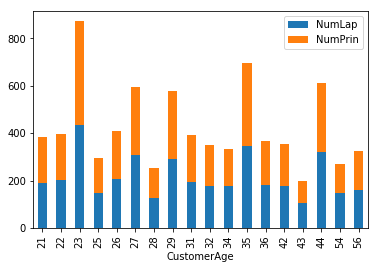

In [49]:
thisandthat = pd.read_sql_query("SELECT CustomerAge, SUM(HPLaptop) as NumLap, SUM(HPPrinter) as NumPrin, SUM(WDexternalHD) as NumWDHD, COUNT(CustomerAge) as NumberOfPeople, HPLaptop FROM trans4cust WHERE (HPLaptop=1 OR HPPrinter=1) AND WDexternalHD=0  GROUP BY CustomerAge HAVING NumLap > 100 OR NumPrin > 100", engine)
plt.figure();
tt = thisandthat.iloc[:,1:3]
tt.index = thisandthat.CustomerAge.astype(int)
tt.plot.bar(stacked=True)
thisandthat